# Pha test của các thuật toán

In [4]:
NUMS_TASK = 800
which_algorithm = "DoubleDQN_old"
iters = 9
eps = 120
loops = 1
REWARD_DROP=[-1]
EMA_list= [1]
colors = ['blue', 'red', 'green', 'orange','yellow']

d:\Lab\improvedAodai
Mean EMA1: -0.03514741028640585


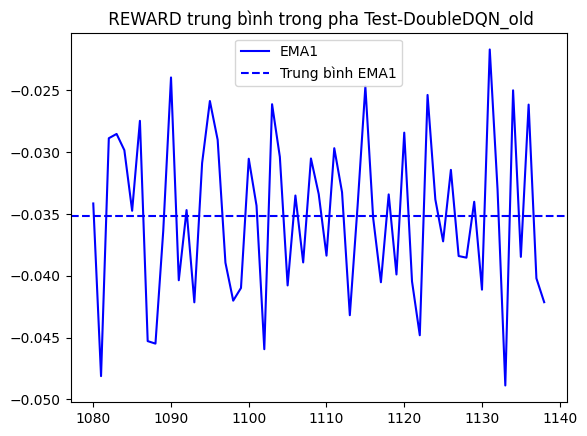

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pathlib import Path

LINK_PROJECT = Path(os.path.abspath('draw_plot.ipynb')).parent.parent
print(LINK_PROJECT)
EMA_dict=dict()
EMA_info=dict()
for reward_drop in REWARD_DROP:
    j=0
    for EMA in EMA_list:
        for i in range(1):
            with open(f"{LINK_PROJECT}/result/result3/{which_algorithm}/env_2_4/5vehicle/{NUMS_TASK}task/EMA{EMA}/reward_drop{reward_drop}/num_iters{iters}/eps{eps}/gamma0.99/{i}/reward.csv", "r") as file:
                if i == 0: EMA_dict[EMA] = pd.read_csv(file)
                else: EMA_dict[EMA] += pd.read_csv(file)

        columns = ['reward', 'reward_accumulate'][0]

        minrange = 9*120
        maxrange = -1

        EMA_info[EMA] = EMA_dict[EMA][columns][minrange:maxrange]
        plt.plot(EMA_info[EMA],color=colors[j], label = f"EMA{EMA}")
        plt.axhline(np.mean(EMA_info[EMA]),color=colors[j], linestyle='--', label=f'Trung bình EMA{EMA}')
        print(f"Mean EMA{EMA}:", np.mean(EMA_info[EMA]))
        j+=1


        # plt.ylim(-0.05, -0)
    plt.title(f' REWARD trung bình trong pha Test-{which_algorithm}')
    plt.legend()
    # plt.savefig(f"{LINK_PROJECT}/fig/{which_algorithm}/env2_4/5vehicle/{NUMS_TASK}task/num_iters{iters}/eps{eps}/REWARD trung bình trong pha Test-{which_algorithm}-reward_drop:{reward_drop}.png")
    plt.show()

        
        

d:\Lab\improvedAodai
Mean EMA1: 146.30651553149247
Mean EMA0.7: 88.16165872743916
Mean EMA0.5: 98.19220546790459
Mean EMA0.3: 109.46614869046802


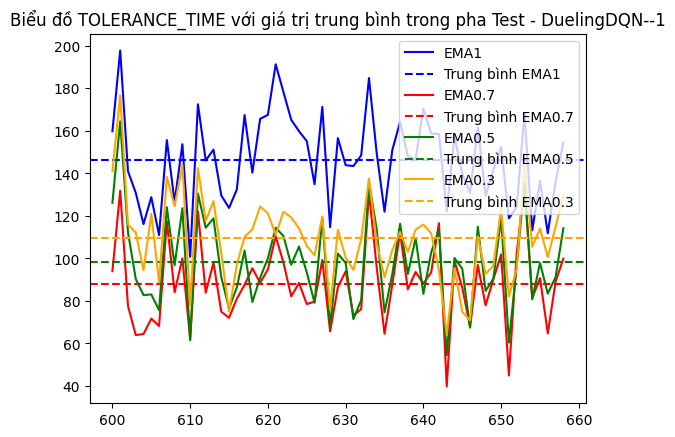

In [20]:
  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pathlib import Path

LINK_PROJECT = Path(os.path.abspath('draw_plot.ipynb')).parent.parent
print(LINK_PROJECT)
EMA_dict=dict()
EMA_info=dict()
for reward_drop in REWARD_DROP:
    j=0
    for EMA in EMA_list:
        for i in range(1,4):
            with open(f"{LINK_PROJECT}/result/result3/{which_algorithm}/env_2_4/5vehicle/{NUMS_TASK}task/EMA{EMA}/reward_drop{reward_drop}/num_iters{iters}/eps{eps}/gamma0.99/{i}/sum_tolerance_time.csv", "r") as file:
                if i == 1: EMA_dict[EMA] = pd.read_csv(file)
                else: EMA_dict[EMA] += pd.read_csv(file)

        columns = ['sum_tolerance_time'][0]

        minrange = 5*120
        maxrange = -1

        EMA_info[EMA] = EMA_dict[EMA][columns][minrange:maxrange]
        plt.plot(EMA_info[EMA],color=colors[j], label = f"EMA{EMA}")
        plt.axhline(np.mean(EMA_info[EMA]),color=colors[j], linestyle='--', label=f'Trung bình EMA{EMA}')
        print(f"Mean EMA{EMA}:", np.mean(EMA_info[EMA]))
        j+=1


        # plt.ylim(-0.05, -0)
    plt.title( f'Biểu đồ TOLERANCE_TIME với giá trị trung bình trong pha Test - {which_algorithm}-{reward_drop}')
    plt.legend()
    # plt.savefig(f"{LINK_PROJECT}/fig/{which_algorithm}/env_2_4/5vehicle/{NUMS_TASK}task/num_iters{iters}/eps{eps}/Biểu đồ TOLERANCE_TIME với giá trị trung bình trong pha Test-{which_algorithm}-reward_drop:{reward_drop}.png")
    plt.show()

d:\Lab\improvedAodai


TypeError: 'Axes' object is not subscriptable

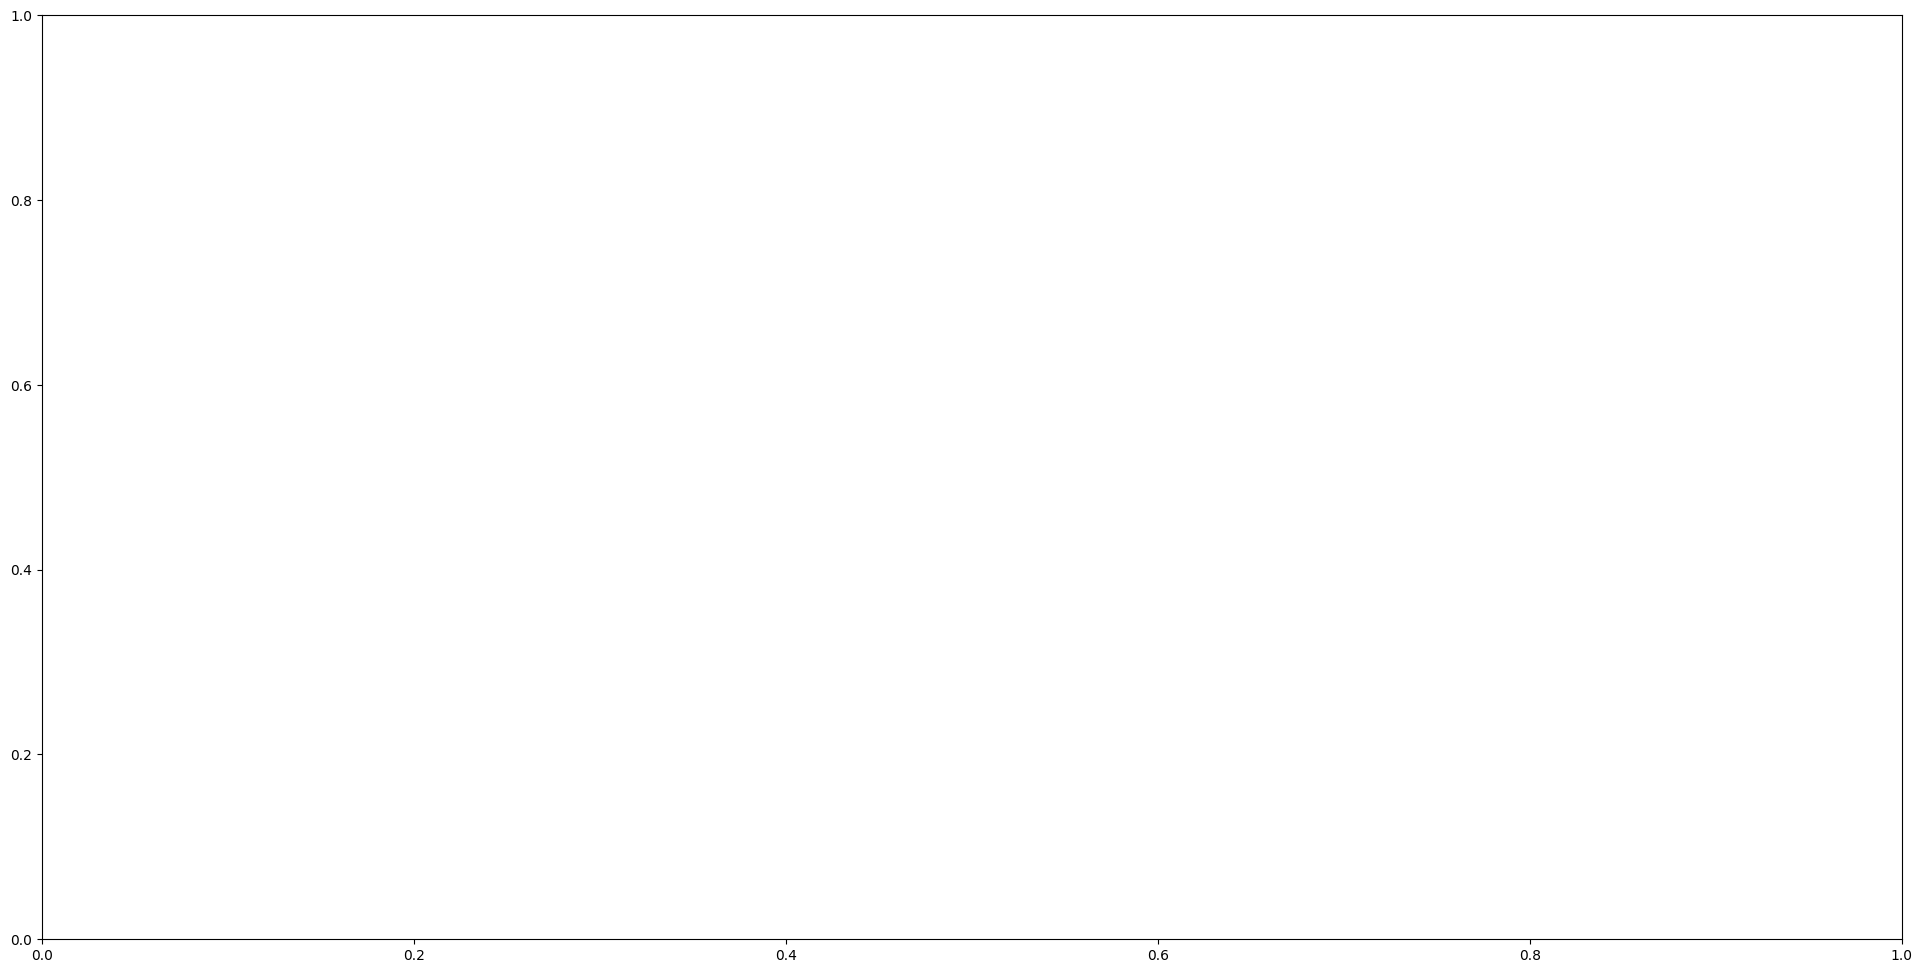

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pathlib import Path

LINK_PROJECT = Path(os.path.abspath('draw_plot.ipynb')).parent.parent
EMA_dict=dict()
EMA_info=dict()

print(LINK_PROJECT)

for reward_drop in REWARD_DROP:
    fig, axes = plt.subplots(1, len(EMA_list),  figsize=(24,12))
    j=0
    for EMA in EMA_list:

        for i in range(1):
            with open(f"{LINK_PROJECT}/result/result3/{which_algorithm}/env_2_4/5vehicle/{NUMS_TASK}task/EMA{EMA}/reward_drop{reward_drop}/num_iters{iters}/eps{eps}/gamma0.99/{i}/server_allocation.csv", "r") as file:
                if i == 0 : EMA_dict[EMA] = pd.read_csv(file)
                else: EMA_dict[EMA] += pd.read_csv(file)

        columns = ['drop', 'server','bus1', 'bus2','bus3', 'bus4','bus5']
        minrange = 9 * 120
        maxrange = -1  

        EMA_dict[EMA] = EMA_dict[EMA][minrange:maxrange].sum()

        axes[j].pie(EMA_dict[EMA], labels=columns, autopct='%1.1f%%')
        axes[j].set_title(f'{EMA}')
        j += 1
    

    plt.title(f'Tỷ lệ các hành động_{which_algorithm}')
    plt.legend()
    # plt.savefig(f"{LINK_PROJECT}/fig/{which_algorithm}/env_2_4/5vehicle/{NUMS_TASK}task/num_iters{iters}/eps{eps}Tỷ lệ các hành động pha Test-{which_algorithm}-reward_drop:{reward_drop}.png")
    plt.show()
